In [34]:
import pandas as pd
import seaborn as sns

In [35]:
dataset = pd.read_csv("./Social_Network_Ads.csv")

In [36]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


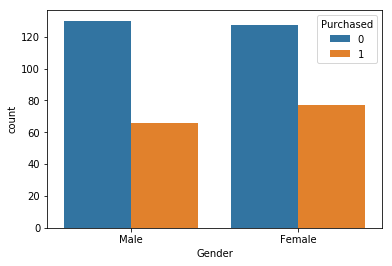

In [37]:
sns.countplot(data=dataset, hue="Purchased", x="Gender")

In [38]:
dataset.drop("User ID", axis=1, inplace=True)

In [39]:
dataset.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [40]:
Y = dataset.iloc[:,3]
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [41]:
dataset.drop("Purchased", axis=1, inplace=True)

In [42]:
dataset.head()

,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000


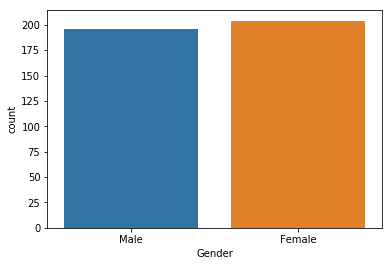

In [43]:
sns.countplot(data=dataset,x="Gender")

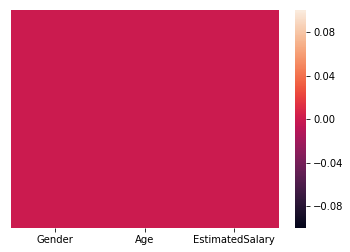

In [44]:
sns.heatmap(dataset.isnull(), yticklabels=False)

In [45]:
dataset.describe()

,Age,EstimatedSalary
count,400.000000,400.000000
mean,37.655000,69742.500000
std,10.482877,34096.960282
min,18.000000,15000.000000
25%,29.750000,43000.000000
50%,37.000000,70000.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


In [46]:
dataset.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
dtype: int64

In [47]:
sex = pd.get_dummies(dataset["Gender"],drop_first=True)

In [48]:
sex.head()

,Male
0,1
1,1
2,0
3,0
4,1


In [49]:
X = pd.concat([dataset,sex],axis=1)
X.head()

,Gender,Age,EstimatedSalary,Male
0,Male,19,19000,1
1,Male,35,20000,1
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,1


In [50]:
X.drop("Gender",axis=1,inplace=True)

In [51]:
X.head()

,Age,EstimatedSalary,Male
0,19,19000,1
1,35,20000,1
2,26,43000,0
3,27,57000,0
4,19,76000,1


In [52]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)

In [53]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=1/3,random_state = 42)

In [54]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear',random_state=42)
classifier.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

In [55]:
predictions = classifier.predict(X_test)

In [56]:
from sklearn.metrics import classification_report
classification_report(predictions,y_test)

'             precision    recall  f1-score   support\n\n          0       0.99      0.79      0.88       101\n          1       0.60      0.97      0.74        33\n\navg / total       0.89      0.84      0.85       134\n'

In [57]:
from sklearn.metrics import accuracy_score
accuracy_score(predictions, y_test)

0.835820895522388

In [58]:
from sklearn.metrics import confusion_matrix
confusion_matrix(predictions,y_test)

array([[80, 21],
       [ 1, 32]])